# Content and Objective

+ Demonstrate graphical representation of convolution
+ User may choose different sequences that are then convolved
+ Illustration of the effect of a system with low pass behavior onto a modulated signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy import signal


# Reminder
 The convolution of two sequences is defined as:
  $$(x*h)[n]:=\sum_{k=-\infty}^{\infty} h[k]\cdot x[n-k]$$

# Here two different impulse responses can be chosen. 

In [2]:
# Example of the convolution of two equal rectangles
# you may redefine function and impulse response

# signal
x = np.array( [ 0, 1, 1, 0, 0, 0, 0 ] )

# impulse response
h = np.array( [ 0,1, 1, 0, 0, 0, 0 ] )

# Visualization, before the impulse responses overlap in the convolution operation

 First the two impulse responses are plotted. Then, $x$ must be flipped, because $k$ appears with negative sign.
The given signals have no common support for n=-1. This is the point, just before they start overlapping in the graphical representation.

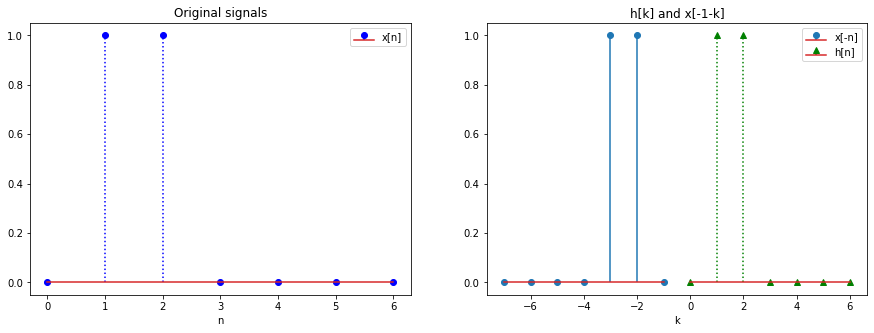

In [3]:
plt.figure(figsize=(15, 5))

# First plot the two original signals
plt.subplot(1, 2, 1, title=('Original signals'))
markerline, stemlines, baseline = plt.stem( np.arange( len( x ) ), x, label='x[n]' )

plt.setp(markerline, color="b")
plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))
plt.setp(stemlines, 'linestyle', 'dotted')
plt.xlabel('n')
plt.legend()


#Plotting of the sequences before they start overlapping in the convolution process
plt.subplot(1, 2, 2, title=(f'h[k] and x[-1-k]'))

#Now the sequence x is flipped because of the negative k in its argument
markerline, stemlines, baseline = plt.stem( np.arange( len( x ) ) - len( x ), np.flip( x ), label='x[-n]' )
markerline, stemlines, baseline = plt.stem( np.arange( len( h ) ), h, markerfmt='^', label='h[n]')

plt.setp(markerline, color="g")
plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))
plt.setp(stemlines, 'linestyle', 'dotted')
plt.xlabel('k')
plt.legend()

# Animation of the graphical evaluation of the convolution.

+ Convolution of two sequences result in a new sequence
+ Each sample of the new sequence can be graphically determined
+ To do so, one sequence is flipped and then step by step swept over the other sequence
+ The 'area' of overlap results in the value of the new sequence

 In the next cell, first the whole convolution is calculated using the scipy toolbox. Afterwards, each point of the sequence that results from the convolution is calculated using a custom implementation. This allows to show in the left plot, which overlapping area results in this specific point.

In [4]:
def illustrate_convolution( n ):
    '''
    IN: Point n of the resulting sequence that shall be calculated
    
    OUT: Animation of the graphical representation
    '''

    # Calculate the whole convolution (black dots in second plot)
    convolution = signal.convolve(x, h)  # Does the convolution with scipy

    if plt.get_fignums():
        plt.clf()
    else:
        plt.figure(figsize=(15, 5))

    # By varying n, slides through h. The current support of x in terms of k is:
    current_x_interval = np.arange( len(x) ) - ( len(x)-1 ) + n

    # Determine areas of overlap
    is_larger_zero = np.array( 0 <= current_x_interval)
    is_smaller_len_h = np.array(len(h) > current_x_interval)

    # Color samples of the two sequences that overlap red
    col_x = np.where(np.logical_and(
        is_larger_zero, is_smaller_len_h), 'r', 'b')
    col_h = np.where(np.flip(np.logical_and(
        is_larger_zero, is_smaller_len_h)), 'r', 'g')

    # Plotting
    plt.subplot(1, 2, 1, title=(f'h[k] and x[{n}-k]'))

    # Plot current position of x
    plt.scatter(current_x_interval, np.flip(x), marker='x', c=col_x, label='x[n]')

    # Plot h
    plt.scatter(np.arange(len(h)), h, marker='o', c=col_h, label='h[n]')

    # Choose limits, such that
    plt.xlim(-len(x)-1, len(h)+len(x)+2)
    plt.xlabel('k')
    plt.legend()

    # Calculates the current point of the convolution --> Flips one signal and sweeps it through the other signal
    # Then, according to the definition of the convolution, sum up over the product of samples that coincide.
    point_convolution = np.sum(np.flip(x)[np.logical_and(
        is_larger_zero, is_smaller_len_h)]*h[np.flip(np.logical_and(is_larger_zero, is_smaller_len_h))])

    # Plot second figure
    plt.subplot(1, 2, 2, title=('Convolution'))

    # First full convolution from toolbok
    markerline, stemlines, baseline = plt.stem( np.arange( len(convolution) ), convolution, label='(x*h)[n]')  # schwarz

    plt.setp(markerline, color="k")
    plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')
    plt.xlim(-1, len(h)+len(x))
    plt.legend()

    # Plot current point that results from the overlap in the left figure
    markerline, stemlines, baseline = plt.stem(n, point_convolution , label='(x*h)[n], current point')  # rot
    plt.setp(markerline, color="r")
    plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')
    plt.xlabel('n')
    plt.legend()


# First as an animation.

In [5]:
w = widgets.interact(illustrate_convolution, n=widgets.Play(
    min=-2, max=len(x)+len(h)-1))


interactive(children=(Play(value=0, description='n', max=13, min=-2), Output()), _dom_classes=('widget-interac…

### Here the overlap can be interactively adapted.

In [6]:
w = widgets.interact( illustrate_convolution, n=widgets.IntSlider(min=-1, max=len(x)+len(h)-1) )


interactive(children=(IntSlider(value=0, description='n', max=13, min=-1), Output()), _dom_classes=('widget-in…

# Implementation of Non-Return-To-Zero modulation:

+ An input value is simply repeated as often as specified  

In [7]:
def nrz( binary_data, sample_values_per_bit ):
    '''
    IN: Binary bit stream, Over sampling factor

    OUT: NRZ modulated sequence
    '''
    return np.repeat(binary_data, sample_values_per_bit)


# Influence of a Low-Pass System on a modulated signal

 In the next cells we investigate the influence of a channel impulse response on our modulated signal. To do so, we modulate our bit stream using NRZ modulation. Afterwards, we transmit the signal over a channel with low-pass behavior. In a simple case, a channel with low-pass behavior can be modeled by an RC element. 

**Reminder**
 
An RC element has the (continuous-time) transfer function
$$G(s)=\frac{1}{1+RCs}$$
 with
    $$ \tau=RC $$
   being the time constant. The higher $\tau$ the lower the cutoff frequency. Our signal consists of high frequency components, due to the NRZ modulation. Therefore, we expect a stronger influence on our signal, the lower the cutoff frequency gets, because high frequency are strongly attenuated.



In [8]:
def rc_element( time_constant, time):
    '''
    IN: Time constant and discretization of time

    OUT: sampled values of the impulse response
    '''

    rc_element = signal.TransferFunction([1], [time_constant, 1])
    
    return signal.impulse( rc_element, T = time )




# Generate bitstream and modulate it with NRZ

In [9]:
#Define time and discretize it
signal_time_length = 20
time_step_size = 0.01

time = np.arange( 0, signal_time_length, step = time_step_size )

#Randomly generate data
binary_data = np.random.randint(
    low=2, size=signal_time_length)  # bit per second

##Non-Return-to-Zero (NRZ) Modulation of the binary data
nrz_signal = nrz(binary_data, int(1/time_step_size)) 




# Plot that allows to adapt the time constant.

In [10]:
def plot_convol(time_constant):
    '''
    IN: Time_constant
    OUT: 2 Plots.
    '''

    #Sampled impulse response of the rc element
    t, impulse_response_rc = rc_element(time_constant, time)

    #Signal after transmission over the channel modeled by an RC element.
    convolved = signal.convolve(nrz_signal, impulse_response_rc)
    convolved = convolved/np.max(convolved)

    
    #PLOTTING
    fig = plt.figure(figsize=(25, 10))

    # First plot 
    ax = plt.subplot(2, 1, 1)
    

    # Modulates signal      
    plt.plot(time, nrz_signal, label='NRZ modulated bit sequence', c='k')
    
    #Impuse Response of the RC element
    plt.plot(t, impulse_response_rc/np.max(impulse_response_rc),
             label='Impulse response of the rc element')

    # Parametrize plot
    ax.set_xlabel('t in [s]')    
    plt.legend(bbox_to_anchor=(1, 1.05))
    ax.set_title('NRZ modulated signal and impulse response of the rc element')

    # Second plot
    ax = plt.subplot(2, 1, 2)

    # Plot of the signal after transmission
    plt.plot(np.arange(start=0, stop=0.01*(len(convolved)),
                       step=0.01), convolved, label='NRZ signal convolved with the impulse response of the rc element')

    
    # Plot original NRZ sequence as reference
    plt.plot(time, nrz_signal, label='NRZ modulated bit sequence', c='k')

    #Parametrize plot
    ax.set_title(
        'Original signal and signal after convolution with rc element')
    plt.xlim(0, signal_time_length+2)
    ax.set_title('C')
    ax.set_xlabel('t in [s]')
    ax.legend( bbox_to_anchor=(1, 1.05))
    plt.tight_layout()


# First plot
 The first plot shows the impulse response of the RC element in blue and the NRZ modulated signal in black. The slider allows to vary the time constant $\tau$.
# Second plot
For higher time constants $\tau$ the sharp edges of the NRZ modulation get smoothened such that the different bits can not be distinguished anymore. This effect is called Inter-Symbol-Interference (ISI) and leads to undesired behavior. Thus, the phenomenon must be avoided using e.g. guard intervals in between the bit positions.

In [11]:
w = widgets.interact(plot_convol, time_constant=widgets.FloatSlider(
    min=0.001, max=2, step=0.01, continuous_update=True, value=0.1))


interactive(children=(FloatSlider(value=0.1, description='time_constant', max=2.0, min=0.001, step=0.01), Outp…